In [8]:



import torch
import torch.backends.cudnn as cudnn
import torch.nn as nn
import torch.nn.functional as F
import torch.nn.parallel
import torch.optim as optim
import torchvision
import torchvision.models as models
import sys
    # caution: path[0] is reserved for script path (or '' in REPL)


import json
import numpy as np
import os
import pandas as pd
import re

import matplotlib.pyplot as plt

In [9]:
#create training plot



output = torch.load('saved_output/vgg16_new_validating_output/output_e0_b64')

In [19]:
#find max epoch and max batch  
output_files = [ i for i in os.listdir('saved_output/vgg16_new_validating_output/') if 'output' in i]
output_files
max_b=0
max_e = 0
for output_file in output_files:
    of = re.findall('\d+$',output_file)
    if int(of[0]) > max_b:
        max_b = int(of[0])
    a= output_file.split('_')
    if int(a[1][1:]) >= max_e:
        max_e = int(a[1][1:])
    



def accuracy(output, target, topk=(1,)):
    """Computes the precision@k for the specified values of k"""
    maxk = max(topk)
    
    batch_size = target.size(0)

    _, pred = output.topk(maxk, 1, True, True)
    pred_t = pred.t()

    correct = pred_t.eq(target.view(1, -1).expand_as(pred_t))

    nb_classes = 185

    confusion_matrix = torch.zeros(nb_classes, nb_classes)
    _, preds = torch.max(output, 1)
    
    for t, p in zip(target.view(-1), preds.view(-1)):
        confusion_matrix[t.long(), p.long()] += 1

    # print(confusion_matrix)
    
    
    # print(confusion_matrix.diag()/confusion_matrix.sum(1))
        
    res = []
    for k in topk:
    	correct_k = torch.sum(torch.reshape(correct[:k],(-1,) ).float()) #.double().sum(0)
    	res.append(correct_k.mul_(100.0 / batch_size))
    res.append(confusion_matrix)
    return res


In [25]:
prec1_list = []
prec1_avg_list = []
prec1_avg_list_temp = []
prec5_list = []
prec5_avg_list = []
prec5_avg_list_temp = []

for e in range(max_e+1):
    for b in range(max_b):
        output = torch.load(f'saved_output/vgg16_new_validating_output/output_e{e}_b{b}')
        target = torch.load(f'saved_output/vgg16_new_validating_output/target_b{b}')

        prec1, prec5, conf1 = accuracy(output.data, target, topk=(1, 5))

        prec1_list.append(prec1)
        prec1_avg_list_temp.append(prec1)

        prec5_list.append(prec5)
        prec5_avg_list_temp.append(prec5)
        
    prec1_avg_list.append(np.average(prec1_avg_list_temp))
    prec1_avg_list_temp = []


    prec5_avg_list.append(np.average(prec5_avg_list_temp))
    prec5_avg_list_temp = []

In [26]:
prec1_array = np.array(prec1_list)
prec1_array_avg = np.array(prec1_avg_list)

prec5_array = np.array(prec5_list)
prec5_array_avg = np.array(prec5_avg_list)

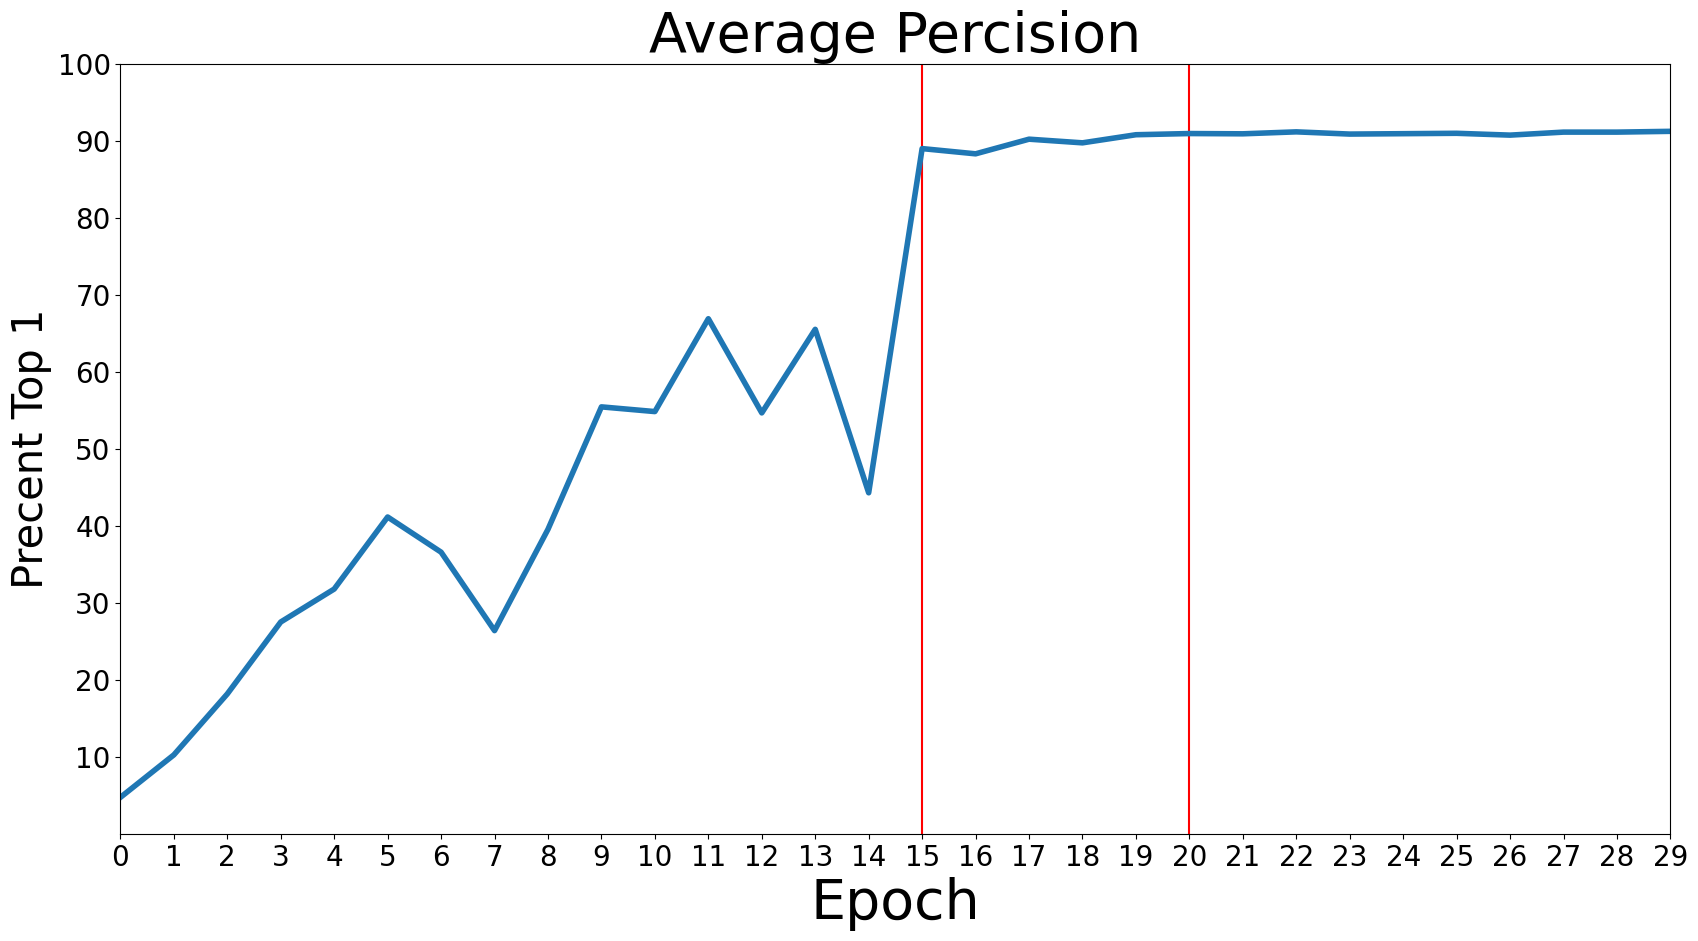

In [27]:
xticks_size = 20
yticks_size = 20
ylabel_size = 30
xlabel_size = 40 
title_size = 40
linewidth = 4



plt.figure(figsize=(20,10))

x = [i for i in range(len(prec1_array_avg))]
plt.axvline(x = 15, color = 'r', label = 'axvline - full height')
plt.axvline(x = 20, color = 'r', label = 'axvline - full height')
# plt.axvline(x = 0, color = 'r', label = 'axvline - full height')
plt.xticks(x,fontsize=xticks_size)
plt.yticks([10,20,30,40,50,60,70,80,90,100],fontsize=yticks_size)
plt.ylabel('Precent Top 1', fontsize=ylabel_size)
plt.xlabel('Epoch',fontsize=xlabel_size)
plt.title('Average Percision', fontsize=title_size)

# plt.margins(0)
plt.xlim([0, max_e])
plt.ylim([0, 100])
plt.plot(x,prec1_array_avg, linewidth = linewidth)

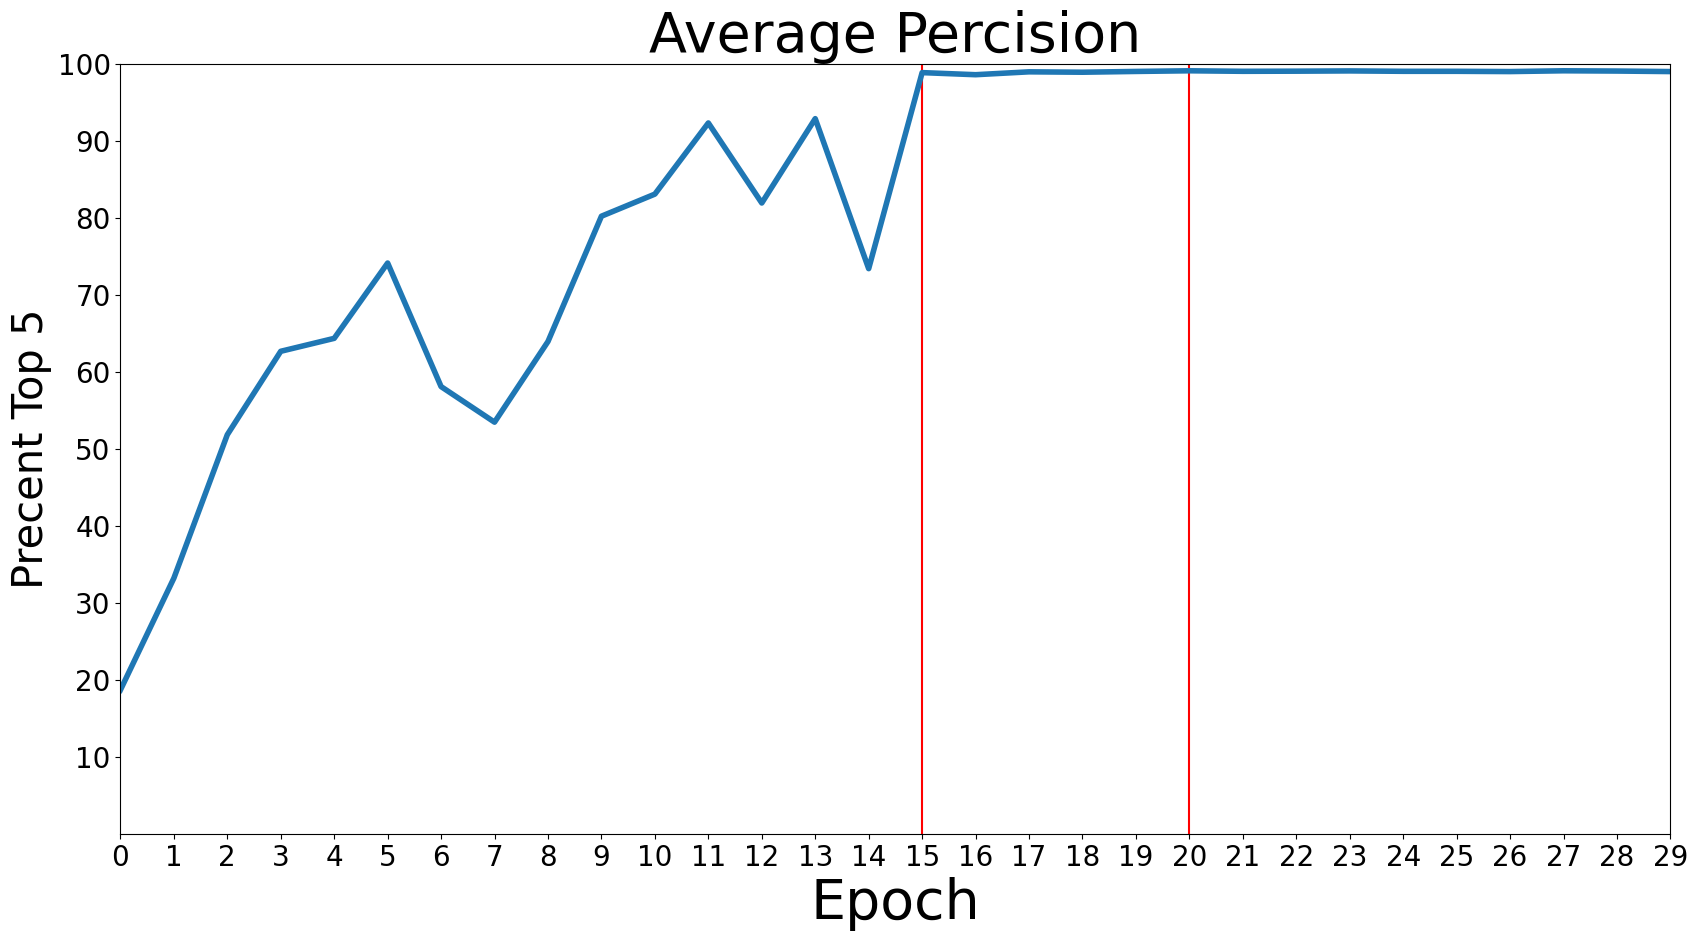

In [28]:
plt.figure(figsize=(20,10))
x = [i for i in range(len(prec5_array_avg))]
plt.axvline(x = 15, color = 'r', label = 'axvline - full height')
plt.axvline(x = 20, color = 'r', label = 'axvline - full height')
plt.xticks(x,fontsize=xticks_size)
plt.yticks([10,20,30,40,50,60,70,80,90,100],fontsize=yticks_size)
plt.ylabel('Precent Top 5', fontsize=ylabel_size)
plt.xlabel('Epoch',fontsize=xlabel_size)
plt.title('Average Percision', fontsize=title_size)

# plt.margins(0)
plt.xlim([0, max_e])
plt.ylim([0, 100])
plt.plot(x,prec5_array_avg, linewidth = linewidth)

In [24]:
x


[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28]